# Scratch File for Brian. No one else should edit or check in.

In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import shared_utils as su
import numpy as np
import pandas as pd
import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
df = su.read_trip_data()
df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [18]:
subscribers = df[df['Subscriber Type'] == 'Subscriber']

In [19]:
subscribers.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,310217.000000,310217.000000,310217.000000,310217.000000,310217.000000
mean,675925.017494,597.299587,58.801445,58.720486,423.478717
std,138124.795325,3976.589433,16.637260,16.814934,159.213750
min,432951.000000,60.000000,2.000000,2.000000,9.000000
25%,557055.000000,325.000000,51.000000,50.000000,328.000000
50%,677257.000000,479.000000,63.000000,63.000000,437.000000
75%,795364.000000,669.000000,70.000000,70.000000,546.000000
max,913460.000000,1852590.000000,84.000000,84.000000,878.000000


In [20]:
subscribers['Start Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         24884
San Francisco Caltrain 2 (330 Townsend)          20923
Temporary Transbay Terminal (Howard at Beale)    14067
Harry Bridges Plaza (Ferry Building)             13211
Townsend at 7th                                  13108
2nd at Townsend                                  12488
Steuart at Market                                12254
Market at 10th                                   10661
Market at Sansome                                10267
Embarcadero at Sansome                            9653
2nd at South Park                                 8903
Market at 4th                                     7964
Powell Street BART                                7898
Beale at Market                                   7676
2nd at Folsom                                     7515
Grant Avenue at Columbus Avenue                   7115
Broadway St at Battery St                         7112
5th at Howard                                     6910
Embarcader

In [21]:
subscribers['End Station'].value_counts()

San Francisco Caltrain (Townsend at 4th)         33201
San Francisco Caltrain 2 (330 Townsend)          21674
Townsend at 7th                                  14719
Harry Bridges Plaza (Ferry Building)             13996
2nd at Townsend                                  13860
Market at Sansome                                12910
Temporary Transbay Terminal (Howard at Beale)    12666
Steuart at Market                                11998
Embarcadero at Sansome                            9470
Market at 10th                                    8963
Powell Street BART                                8471
Market at 4th                                     7788
2nd at South Park                                 7725
5th at Howard                                     7371
Civic Center BART (7th at Market)                 6914
Howard at 2nd                                     6862
Embarcadero at Folsom                             6694
Broadway St at Battery St                         6658
Embarcader

In [22]:
subscribers['Zip Code'].value_counts()

94107    45819
94105    19915
94133    15868
94103    14446
94111    10697
94102     9696
94109     6029
95112     4488
94403     4124
94611     3998
94501     3940
94158     3918
94117     3865
94602     3783
94110     3471
94114     3425
95110     3421
94010     3323
94610     3229
94025     3109
94040     3052
94108     3003
94041     2902
94070     2845
94002     2772
94402     2746
94608     2704
94401     2601
94404     2552
94087     2248
         ...  
2140         6
91789        6
94956        5
95031        5
10021        4
98134        4
90034        4
946-2        4
95409        3
96161        3
94088        3
95815        2
90069        2
94511        2
75202        2
95160        2
98107        2
90018        2
94214        2
95404        2
93930        2
95015        2
95156        2
74133        1
90405        1
95497        1
92130        1
86004        1
37405        1
48237        1
Name: Zip Code, dtype: int64

In [23]:
subscribers['full_route'] = subscribers['Start Station'] + " & " + subscribers['End Station']
#full_route info

/Users/brianschneider/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
subscribers.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,full_route
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,Harry Bridges Plaza (Ferry Building) & San Fra...
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,San Antonio Shopping Center & Mountain View Ci...
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,Post at Kearny & 2nd at South Park
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,San Jose City Hall & San Salvador at 1st
5,913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118,Yerba Buena Center of the Arts (3rd @ Howard) ...


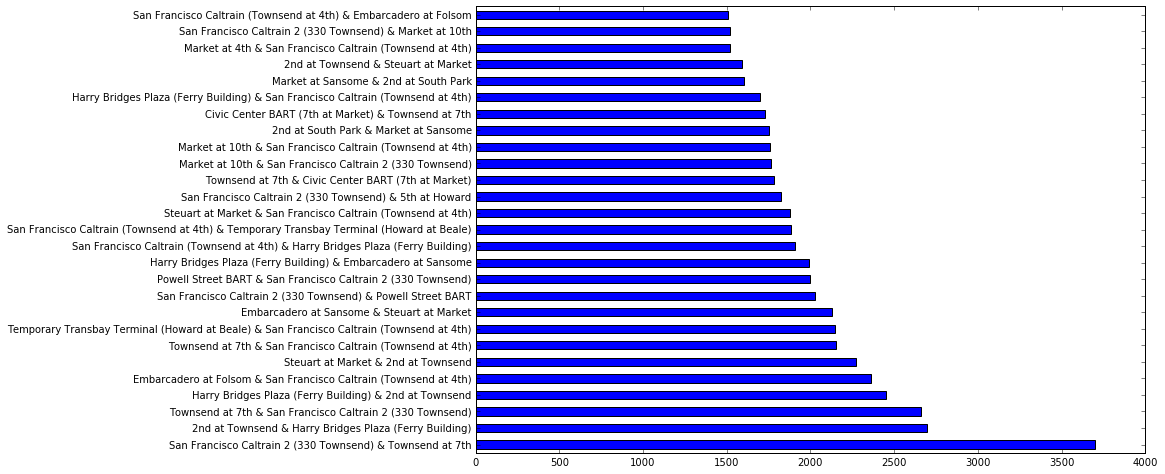

In [26]:
subscribers['full_route'].value_counts()[subscribers['full_route'].value_counts() > 1500].plot(kind="barh", figsize=(12,8))

In [37]:
ranges = [0,300,600,900,1200,1500,1800,2100,2400]
labels = ['00-05 mins','05-10 mins','10-15 mins','15-20 mins','20-25 mins','25-30 mins','30-35 mins','35-40 mins']

In [38]:
subscribers['Duration2'] = pd.cut(subscribers.Duration, ranges, labels=labels).astype('category')

/Users/brianschneider/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


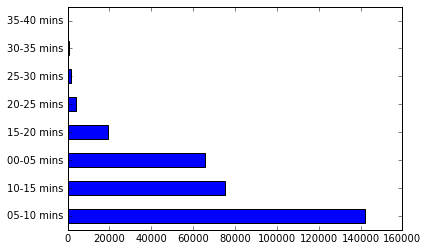

In [40]:
subscribers.Duration2.value_counts().plot(kind = 'barh')
#number of subscriber rides that fall in a duration bucket

In [84]:
subscribers.groupby(['full_route'])['Duration'].mean()
#average duration by full route

full_route
2nd at Folsom & 2nd at Folsom                                                                    1336.166667
2nd at Folsom & 2nd at South Park                                                                 222.006969
2nd at Folsom & 2nd at Townsend                                                                   311.181159
2nd at Folsom & 5th at Howard                                                                     431.542857
2nd at Folsom & Beale at Market                                                                   355.107438
2nd at Folsom & Broadway St at Battery St                                                         644.238806
2nd at Folsom & Civic Center BART (7th at Market)                                                 673.750000
2nd at Folsom & Clay at Battery                                                                   438.592275
2nd at Folsom & Commercial at Montgomery                                                          479.062500
2nd at F

In [113]:
subscribers.Duration.describe()

count     310217.000000
mean         597.299587
std         3976.589433
min           60.000000
25%          325.000000
50%          479.000000
75%          669.000000
max      1852590.000000
Name: Duration, dtype: float64

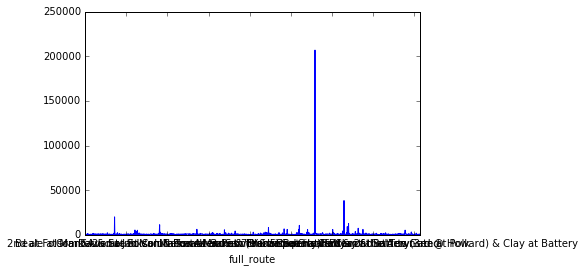

In [114]:
subscribers.groupby(['full_route'])['Duration'].mean().plot()

In [93]:
subscribers.groupby(['full_route'])['Duration2'].value_counts().head()
#allows you to see frequency of duration for full routes

full_route                     Duration2 
2nd at Folsom & 2nd at Folsom  10-15 mins    12
                               00-05 mins    11
                               15-20 mins     6
                               05-10 mins     5
                               20-25 mins     2
dtype: int64

In [98]:
subscribers.groupby(['full_route'])['Duration'].describe().head()
#allows you to see duration metrics for full routes

full_route                          
2nd at Folsom & 2nd at Folsom  count      42.000000
                               mean     1336.166667
                               std      2885.074272
                               min        61.000000
                               25%       264.000000
dtype: float64

In [115]:
#i want to look at trends by day, over time